
# Simple AutoEncoders with Image Data

Here is a simple autoencoder with just the dense layers.

Load the data and import the libraries.

In [4]:
#
# Import relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:


import tensorflow as tf
from tensorflow import keras

In [8]:
print(tf.__version__)

2.15.0


In [45]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense


In [46]:
# Load MNIST data and store it in variables x_train, x_test. Note -  we do not need labels as it's autoencoder.
(x_train,_), (x_test, _) = mnist.load_data()

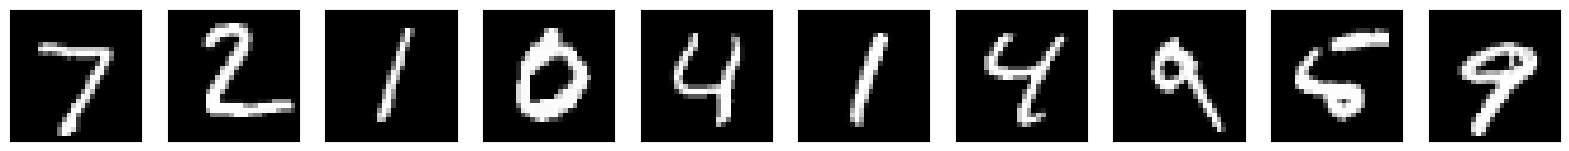

In [47]:
# Plot a few data points
%matplotlib inline

n = 10  # Number of records that will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

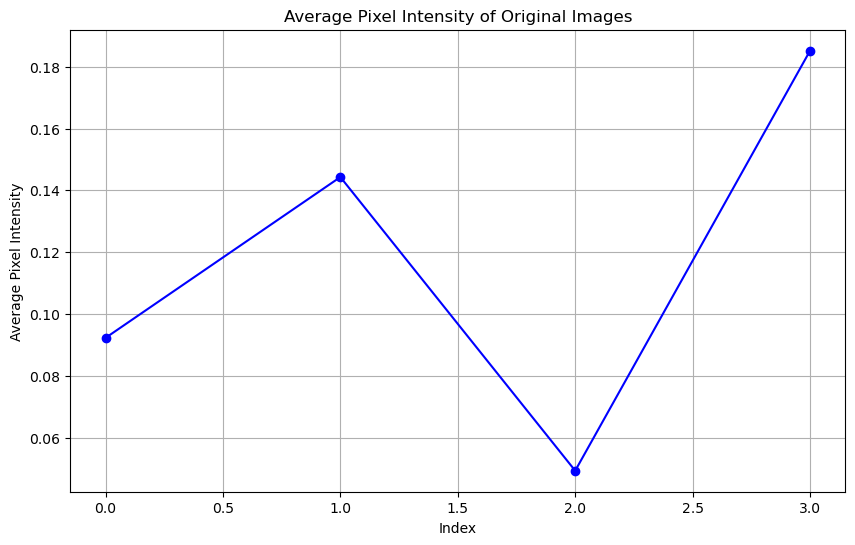

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the average pixel intensity across the images for each index i
avg_intensity = [np.mean(x_test[i]) for i in range(n)]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(range(n), avg_intensity, marker='o', color='b')  # Plotting the graph
plt.xlabel('Index')  # Label for x-axis
plt.ylabel('Average Pixel Intensity')  # Label for y-axis
plt.title('Average Pixel Intensity of Original Images')  # Title for the graph
plt.grid(True)  # Enabling grid
plt.show()


In [48]:
# Normalize train data - Divide by 255
x_train  = x_train/255
# Normalize test data - Divide by 255
x_test = x_test/255

## Basic AutoEncoder

Build a basic symmetric encoder-decoder network that recreates the image.  This network could be used in dimensionaliry reduction or feature learning. 

In [49]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))


# Add as many hidden layers in the encoder network of your choise
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD


# The last TWO layers of the encoder and decoder must be matched (see the following decoder cell.
#

In [50]:
# print the encoder model


In [51]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

#
# Add as many layers in the decoder as you want. Reember - Encoder and decoder need to be symmetric.
encoder.add(Dense(400, activation="relu"))
encoder.add(Dense(200, activation="relu"))
encoder.add(Dense(100, activation="relu"))
encoder.add(Dense(50, activation="relu"))
encoder.add(Dense(25, activation="relu"))



In [52]:
print(encoder.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 400)               314000    
                                                                 
 dense_8 (Dense)             (None, 200)               80200     
                                                                 
 dense_9 (Dense)             (None, 100)               20100     
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                                 
 dense_11 (Dense)            (None, 25)                1275      
                                                                 
Total params: 420625 (1.60 MB)
Trainable params: 42062

In [55]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))



#Add as many layers in the decoder as you want. Remeber - decoder nrrf to symmetric.
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(84,activation='relu'))
#

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [57]:
# print the decoder model

print(decoder.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 50)                1300      
                                                                 
 dense_15 (Dense)            (None, 100)               5100      
                                                                 
 dense_16 (Dense)            (None, 200)               20200     
                                                                 
 dense_17 (Dense)            (None, 400)               80400     
                                                                 
 dense_18 (Dense)            (None, 84)                33684     
                                                                 
 dense_19 (Dense)            (None, 784)               66640     
                                                                 
 reshape (Reshape)           (None, 28, 28)          

In [58]:
autoencoder = Sequential([encoder, decoder]) # Combine encoder and decoder together.
# Define your autoencoder model by specifying the input and output
autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))

# Compile your autoencoder model as you would with any other model
autoencoder.compile(optimizer='adam', loss='mse')  # Example optimizer and loss function

# Print the summary of the autoencoder model
print(autoencoder.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2_input (InputLaye  [(None, 28, 28)]          0         
 r)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 400)               314000    
                                                                 
 dense_8 (Dense)             (None, 200)               80200     
                                                                 
 dense_9 (Dense)             (None, 100)               20100     
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                            

In [59]:
# print the autoencoder model
print(autoencoder.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2_input (InputLaye  [(None, 28, 28)]          0         
 r)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 400)               314000    
                                                                 
 dense_8 (Dense)             (None, 200)               80200     
                                                                 
 dense_9 (Dense)             (None, 100)               20100     
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                             

In [60]:
# Compile the autoencoder. Use binary_crossenropy as loss and metrics as accuracy.
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [61]:
# Fit the autoencoder. Note - Input and output are same. x_train is your train data, x_test is your validation data.
autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_data=(x_test, x_test))


Epoch 1/10


1875/1875 [==============================] - 11s 5ms/step - loss: 0.1885 - accuracy: 0.1546 - val_loss: 0.1443 - val_accuracy: 0.2033
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1342 - accuracy: 0.2217 - val_loss: 0.1256 - val_accuracy: 0.2321
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1217 - accuracy: 0.2391 - val_loss: 0.1171 - val_accuracy: 0.2392
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1150 - accuracy: 0.2496 - val_loss: 0.1112 - val_accuracy: 0.2540
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1103 - accuracy: 0.2574 - val_loss: 0.1074 - val_accuracy: 0.2604
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1069 - accuracy: 0.2639 - val_loss: 0.1054 - val_accuracy: 0.2564
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1047 - accuracy: 0.2679 - val_loss: 0.1036 - val_ac

313/313 [==============================] - 1s 2ms/step


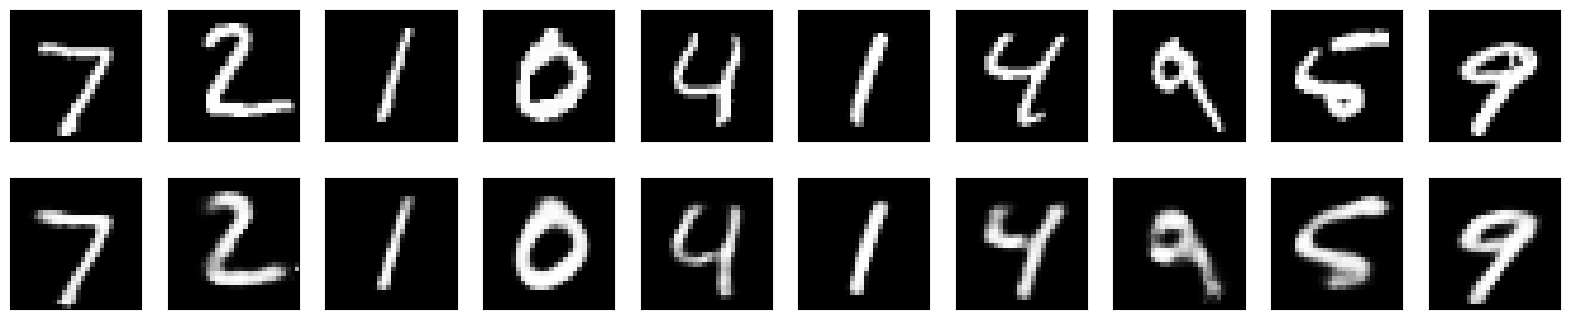

In [62]:
# Check a few sample images.

    # 
    # Display original image - Just line sample code provided earlier.
    #

    # 
    # Display reconstruced (decoded) images. You need to slightly change your code.
    #



import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstructed (decoded) images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


# AutoEncoders for Denoising Images

Use the same digit data set. Add Gaussian noise to it to train an autoencoder that removes noise. Test the noisy samples. 

313/313 [==============================] - 1s 2ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

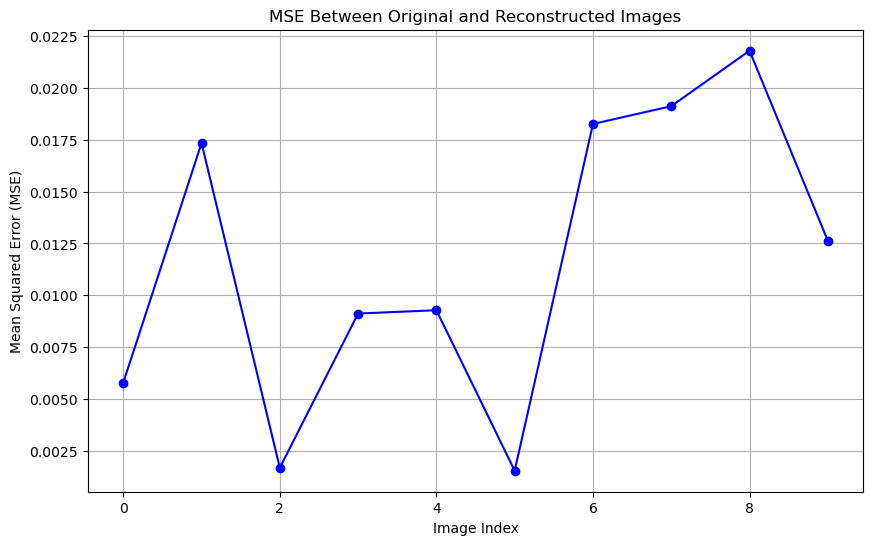

In [91]:
import matplotlib.pyplot as plt
import numpy as np

decoded_imgs = autoencoder.predict(x_test)

n = 10
mse_values = []  # List to store MSE values

# Calculate MSE for each image pair
for i in range(n):
    mse = np.mean(np.square(x_test[i] - decoded_imgs[i]))  # Calculate MSE
    mse_values.append(mse)  # Append MSE value to the list

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(range(n), mse_values, marker='o', color='b')  # Plotting the graph
plt.xlabel('Image Index')  # Label for x-axis
plt.ylabel('Mean Squared Error (MSE)')  # Label for y-axis
plt.title('MSE Between Original and Reconstructed Images')  # Title for the graph
plt.grid(True)  # Enabling grid
plt.show


In [63]:
from tensorflow.keras.layers import GaussianNoise

In [64]:
sample = GaussianNoise(0.2)
noisey = sample(x_test[0:2],training=True)

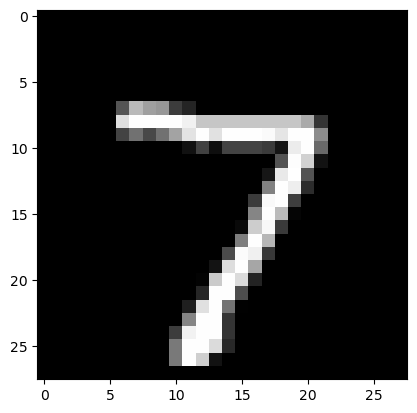

In [65]:
plt.imshow(x_test[0])

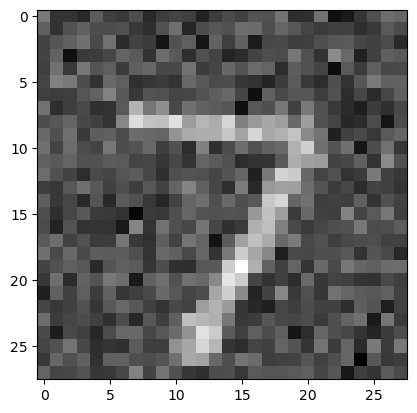

In [66]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

# Input - Images with noise
# Labels - Clean images.

In [77]:

from keras.models import Sequential
from keras.layers import Flatten, GaussianNoise, Dense

encoder = Sequential()
encoder.add(Flatten(input_shape=[28, 28]))
encoder.add(GaussianNoise(0.2))

# Add more layers to your encoder network
encoder.add(Dense(128, activation='relu'))
encoder.add(Dense(64, activation='relu'))
encoder.add(Dense(25, activation='relu'))

# You can add more layers as needed


In [78]:
from keras.models import Sequential
from keras.layers import Dense, Reshape

decoder = Sequential()
# Assuming your encoder's last layer outputs data with shape (None, 25)
# Adjust the decoder's first layer to expect an input shape of [25]
decoder.add(Dense(50, input_shape=[25], activation='relu'))


# Add more layers to your decoder network
decoder.add(Dense(64, activation='relu'))
decoder.add(Dense(128, activation='relu'))

# You can add more layers as needed

# Final layer to reconstruct the image
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))


In [79]:
noise_remover = Sequential([encoder, decoder])

In [80]:
# Compile the network as earlier
noise_remover.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [81]:
# Fit the network as earlier.
noise_remover.fit(x_train, x_train, epochs=10, batch_size=32, validation_data=(x_test, x_test))


Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.1662 - accuracy: 0.1823 - val_loss: 0.1265 - val_accuracy: 0.2281
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1235 - accuracy: 0.2337 - val_loss: 0.1122 - val_accuracy: 0.2494
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1146 - accuracy: 0.2504 - val_loss: 0.1068 - val_accuracy: 0.2635
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1104 - accuracy: 0.2598 - val_loss: 0.1029 - val_accuracy: 0.2625
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1076 - accuracy: 0.2660 - val_loss: 0.1006 - val_accuracy: 0.2718
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1053 - accuracy: 0.2714 - val_loss: 0.0983 - val_accuracy: 0.2763
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1034 - accuracy: 0.2742 - val_loss: 0.0970 - val_accuracy:

In [85]:
ten_noisey_images = sample(x_test[0:10], training=True)
denoised = noise_remover(ten_noisey_images[0:10])


The Original


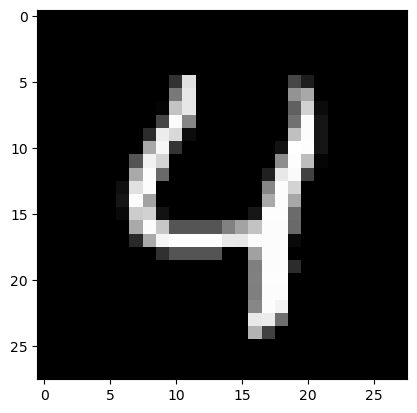

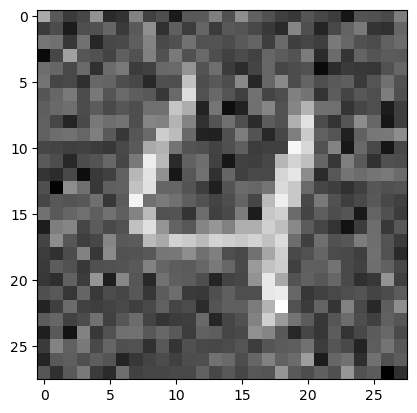

After going through denoiser


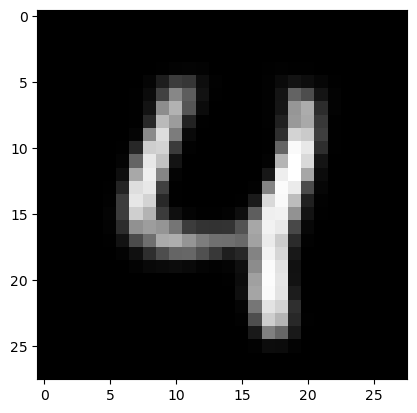

In [88]:
n = 4
print("The Original")
plt.imshow(x_test[n])
plt.show()


# Assuming you have defined ten_noisey_images earlier
plt.imshow(ten_noisey_images[n])
plt.show()

plt.show()


print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()

The Original
After going through denoiser


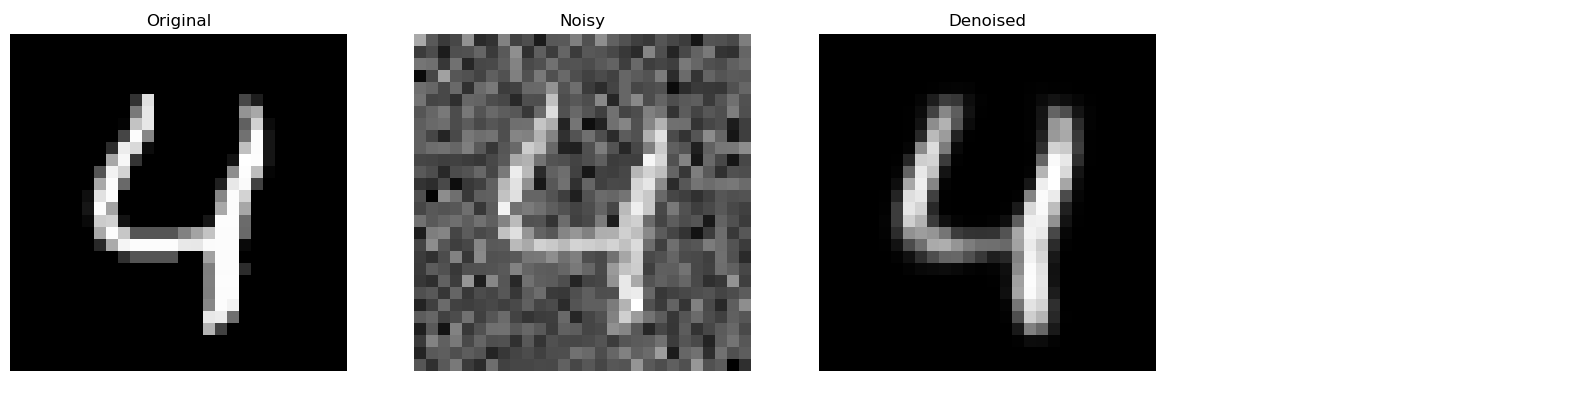

In [92]:
import matplotlib.pyplot as plt

# Define the number of images
n = 4

# Create subplots to display images
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Display original image
print("The Original")
axs[0].imshow(x_test[n])
axs[0].set_title("Original")

# Display noisy image
axs[1].imshow(ten_noisey_images[n])
axs[1].set_title("Noisy")

# Display denoised image
print("After going through denoiser")
axs[2].imshow(denoised[n])
axs[2].set_title("Denoised")

# Remove ticks and labels for better visualization
for ax in axs:
    ax.axis('off')

plt.show()


## Lab Logbook requirement:

- Put the model summary for task 1 in you lab logbook.

Ensure that no code or other information is added to the logbook and that only required information is present.  Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.

NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.